In [1]:
import os
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

In [3]:
path = '../data/'

train = pd.read_csv(path+'5_train.csv')
test = pd.read_csv(path+'5_test.csv')

train.shape, test.shape

((1437, 91), (518, 89))

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [5]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '버스정류장',
       '단지내주차면수', 'ERROR1', '임대건물구분_lb', '상가', '아파트', '지역_lb', '강원도', '경기도',
       '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시',
       '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', '공급유형_lb', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'ERROR1_lb', '나머지', '분양상가',
       '분양아파트', '총세대수_lb', '총세대수_lb_A1', '총세대수_lb_B1', '총세대수_lb_C1',
       '총세대수_lb_D1', '총세대수_lb_E1', '전용면적_5', '전용면적_15', '전용면적_20', '전용면적_25',
       '전용면적_30', '전용면적_35', '전용면적_40', '전용면적_45', '전용면적_50', '전용면적_55',
       '전용면적_60', '전용면적_65', '전용면적_70', '전용면적_75', '전용면적_80', '전용면적_100',
       '지역_cat', '등록차량수', '전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합', '면적_세대수_비율',
       '전용면적_비례_차량수'],
      dtype='object')

In [10]:
train_num.columns

Index(['총세대수', '전용면적', '공가수', '버스정류장', '단지내주차면수', '임대건물구분_lb', '상가', '아파트',
       '지역_lb', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'ERROR1_lb', '나머지', '분양상가', '분양아파트', '총세대수_lb_A1', '총세대수_lb_B1',
       '총세대수_lb_C1', '총세대수_lb_D1', '총세대수_lb_E1', '전용면적_5', '전용면적_15',
       '전용면적_20', '전용면적_25', '전용면적_30', '전용면적_35', '전용면적_40', '전용면적_45',
       '전용면적_50', '전용면적_55', '전용면적_60', '전용면적_65', '전용면적_70', '전용면적_75',
       '전용면적_80', '전용면적_100', '등록차량수', '전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합',
       '면적_세대수_비율', '전용면적_비례_차량수'],
      dtype='object')

In [27]:
cols_cat = ['임대건물구분_lb', '지역_lb', '공급유형_lb', '자격유형_lb', 'ERROR1_lb','전용면적_5', '지역_cat', '총세대수_lb']
cols_bool = ['상가', '아파트',
            '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', 
             '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도','충청북도',
            '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)','공공임대(분납)', '국민임대', '영구임대', '임대상가', 
             '장기전세', '행복주택',
             'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
             '나머지', '분양상가', '분양아파트',
             '총세대수_lb_A1', '총세대수_lb_B1','총세대수_lb_C1', '총세대수_lb_D1', '총세대수_lb_E1',
             '전용면적_15','전용면적_20', '전용면적_25', '전용면적_30', '전용면적_35', '전용면적_40', '전용면적_45',
       '전용면적_50', '전용면적_55', '전용면적_60', '전용면적_65', '전용면적_70', '전용면적_75','전용면적_80', '전용면적_100']

# train[cols_cat] = train[cols_cat].astype('category')
train[cols_bool] = train[cols_bool].astype('boolean')

## 수치형 피처
### 결과
단지내주차면수, 전용면적별세대수 (+ 면적_세대수_곱_총합, 면적_세대수_비율)   
cf. 면전_세대수_곱은 전용면적별세대수와 상관관계가 0.9로 매우 높아서 다중공산성의 위험 때문에 피처로 사용하지 않는 것이 좋겠다.

In [59]:
train_num = train.select_dtypes(include=np.number)
train_num.drop("등록차량수", axis=1, inplace=True)
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   총세대수         1437 non-null   int64  
 1   전용면적         1437 non-null   int64  
 2   공가수          1437 non-null   float64
 3   버스정류장        1437 non-null   float64
 4   단지내주차면수      1437 non-null   float64
 5   전용면적별세대수     1437 non-null   int64  
 6   면적_세대수_곱     1437 non-null   int64  
 7   면적_세대수_곱_총합  1437 non-null   int64  
 8   면적_세대수_비율    1437 non-null   float64
 9   전용면적_비례_차량수  1437 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 112.4 KB


In [23]:
# print(plt.colormaps())

<AxesSubplot:>

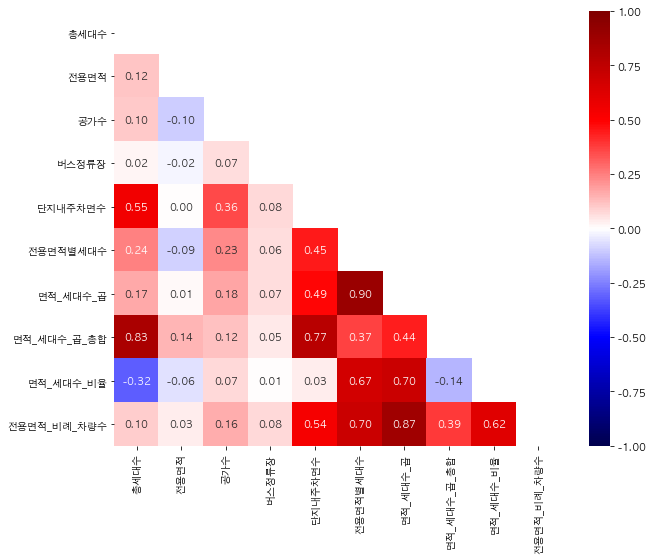

In [60]:
mask = np.triu(np.ones_like(train_num.corr()))

plt.figure(figsize=(10,8))
sns.heatmap(train_num.corr(), annot=True, fmt='.2f', mask=mask, vmax=1, vmin=-1,cmap='seismic')

<AxesSubplot:>

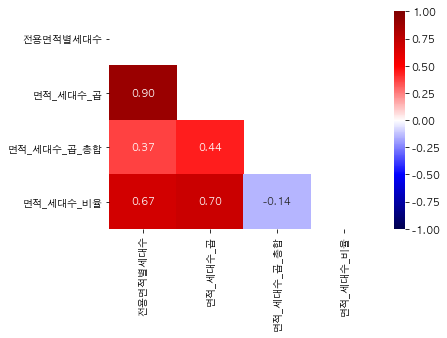

In [61]:
# 다중공산성
tmp = train_num[['전용면적별세대수','면적_세대수_곱','면적_세대수_곱_총합','면적_세대수_비율']].corr()
mask = np.triu(np.ones_like(tmp))
sns.heatmap(tmp, annot=True, fmt='.2f', mask=mask, vmax=1, vmin=-1,cmap='seismic')

In [32]:
train_cat = train.select_dtypes(include='category')
train_cat['전용면적_비례_차량수'] = train['전용면적_비례_차량수']
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   임대건물구분_lb    1437 non-null   category
 1   지역_lb        1437 non-null   category
 2   공급유형_lb      1437 non-null   category
 3   자격유형_lb      1437 non-null   category
 4   ERROR1_lb    1437 non-null   category
 5   전용면적_5       1437 non-null   category
 6   지역_cat       1437 non-null   category
 7   전용면적_비례_차량수  1437 non-null   float64 
dtypes: category(7), float64(1)
memory usage: 24.1 KB


In [33]:
train_cat.head(2)

,임대건물구분_lb,지역_lb,공급유형_lb,자격유형_lb,ERROR1_lb,전용면적_5,지역_cat,전용면적_비례_차량수
0,1,15,5,0,0,35,mid,334.782392
1,1,15,5,0,0,45,mid,67.853821


## 범주형 피처
### 결과
- 임대건물구분, 전용면적_5, 총세대수, 지역_cat 중 'high', 공급유형 중 '공공분양', 

<Figure size 864x720 with 0 Axes>

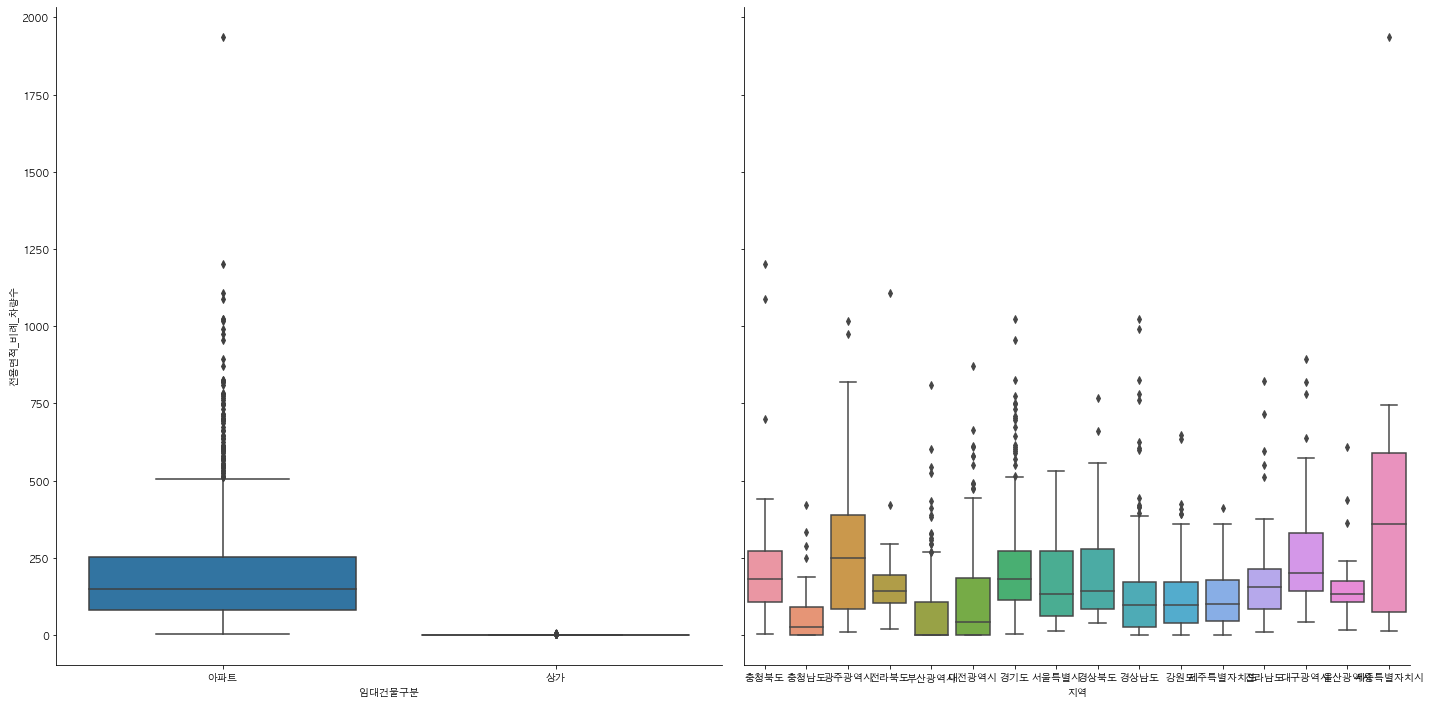

In [53]:
plt.figure(figsize=(12,10))
g = sns.PairGrid(data=train,
                x_vars = ['임대건물구분', '지역'],
                y_vars = ['전용면적_비례_차량수'],
                size=10, height=3)
g.map(sns.boxplot)

<Figure size 864x720 with 0 Axes>

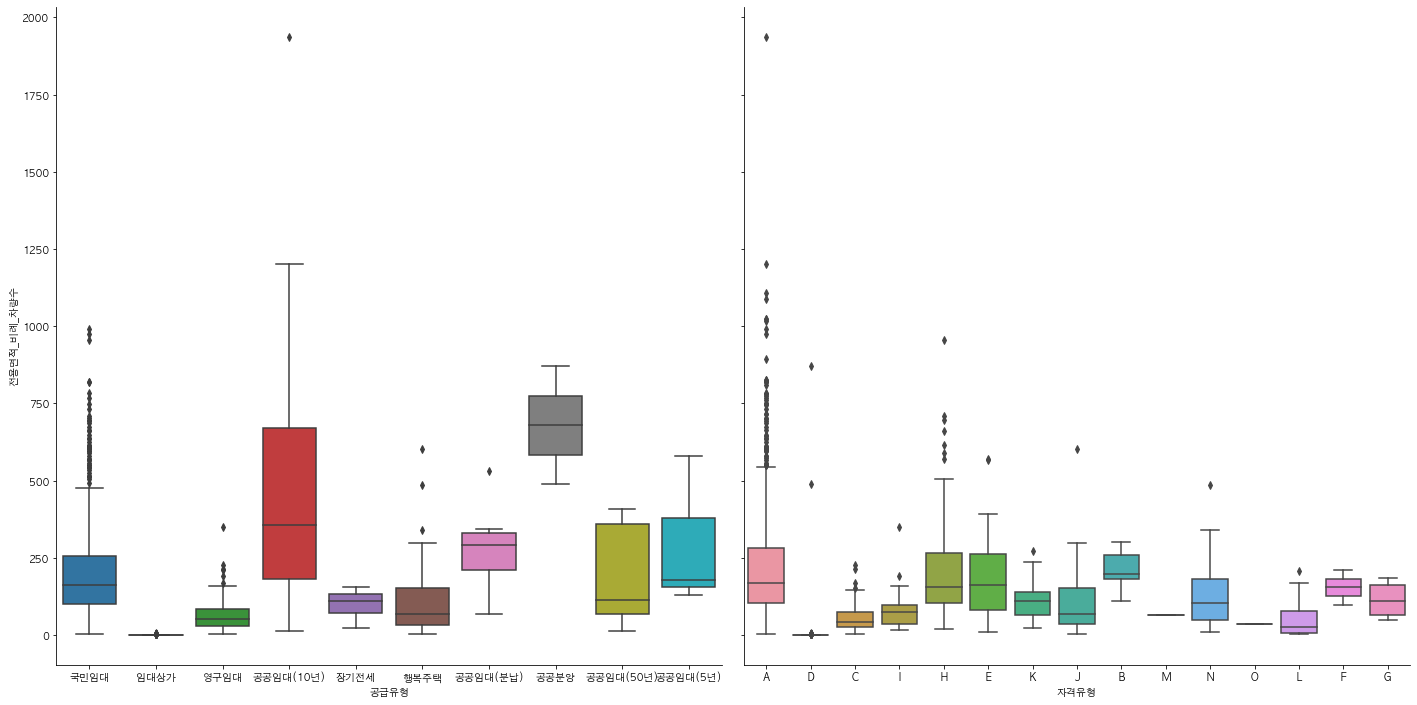

In [66]:
plt.figure(figsize=(12,10))
g = sns.PairGrid(data=train,
                x_vars = ['공급유형','자격유형'],
                y_vars = ['전용면적_비례_차량수'],
                size=10, height=3)
g.map(sns.boxplot)

<Figure size 864x720 with 0 Axes>

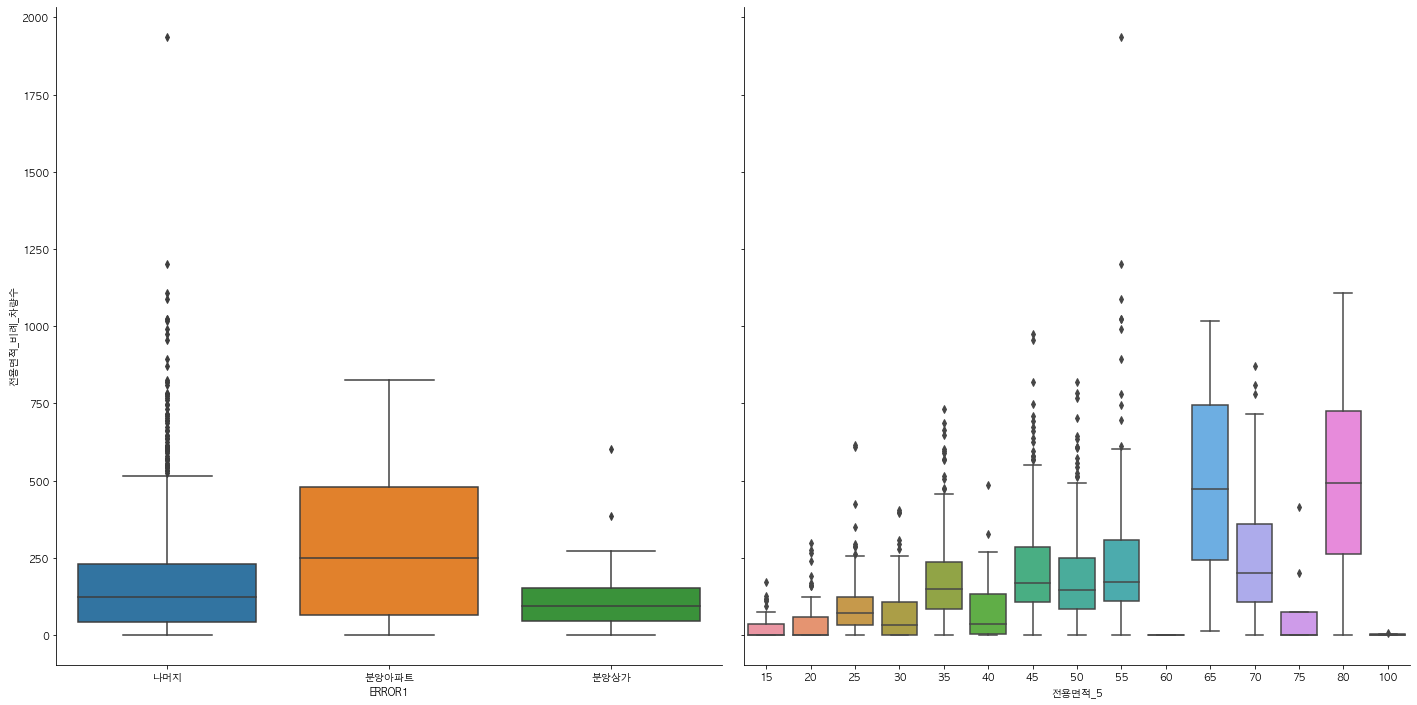

In [56]:
plt.figure(figsize=(12,10))
g = sns.PairGrid(data=train,
                x_vars = ['ERROR1', '전용면적_5'],
                y_vars = ['전용면적_비례_차량수'],
                size=10, height=3)
g.map(sns.boxplot)


<Figure size 864x720 with 0 Axes>

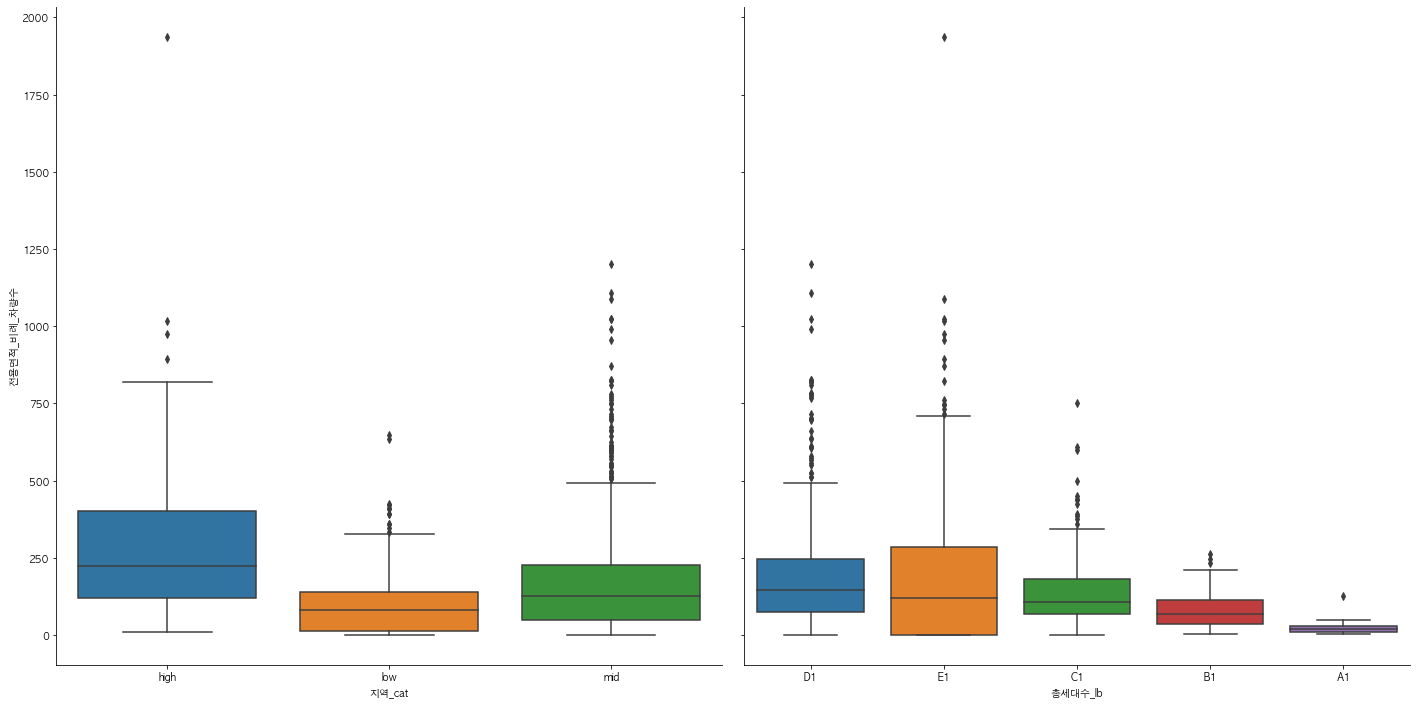

In [63]:
plt.figure(figsize=(12,10))
g = sns.PairGrid(data=train,
                x_vars = ['지역_cat','총세대수_lb'],
                y_vars = ['전용면적_비례_차량수'],
                size=10, height=3)
g.map(sns.boxplot)


In [ ]:

sel = 

X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler()# MinMaxScaler StandardScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:6]
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,6:]), axis=1)

# 모델 
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)
rf_score = np.abs(rf_scores.mean())
print("RandomForestRegressor : ", rf_score)